# 核密度函数图


## 核密度估计

核密度估计 (Kernel Density Estimation, KDE) 是一种用于估计未知概率密度函数的非参数方法，适用于连续型数据且不依赖于事先指定的分布形式。其基本思想是：在密度函数的每一个估计点上，根据样本点到该点的距离，使用核函数分配权重并加权平均，从而构建平滑的密度曲线。

设样本为 $x_1, x_2, \dots, x_n$，其密度函数在任意点 $x$ 上的估计形式为：

$$
\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

其中：

- $K(\cdot)$ 是核函数（kernel function），通常是一个对称的概率密度函数；
- $h > 0$ 是带宽参数（bandwidth），控制核函数的缩放程度和平滑水平；
- $\hat{f}_h(x)$ 是点 $x$ 处的密度估计值。

### 核函数

在实际应用中，核函数的选择对估计结果的影响相对较小，而带宽的设置对估计曲线的光滑程度影响较大。

核函数的作用可以理解为：在估计点 $x$ 处，根据样本点 $x_i$ 与 $x$ 之间的距离，赋予不同的权重。距离 $x$ 越近的样本点，其权重越大；距离越远，权重越小。通过对所有样本点的加权平均，得到该点的密度估计。将所有位置的估计值拼接起来，即可得到整体的密度函数曲线。

为了更清楚地理解核函数的加权机制，我们可以对距离进行标准化处理，设：

$$
u_i = \frac{X_i - c}{h}
$$

则以下两式等价：

$$
|u_i| \leq 1 \Longleftrightarrow |X_i - c| \leq h
$$

记 $D_i = |X_i - c|$，表示第 $i$ 个观察值与估计点 $c$ 的距离。核函数的任务就是为每个 $D_i$ 分配权重。

如下图所示，三种典型核函数的权重分配机制具有显著差异：

<img style="width: 600px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig-NP-kernel-fn01.png">

- Uniform 核：在 $|u| \leq 1$ 范围内赋予所有观察值相同的权重，超出范围的样本点权重为 0 (相当于弃之不用)。对应的密度估计不具有平滑性，常用于教学演示。
- Triangle 核：采用线性下降的加权方式，距离估计点越近权重越大，边界处权重为 0，估计结果具有一定的连续性。
- Epanechnikov 核：采用抛物线型权重函数，在 $u=0$ 处取得最大值，具有最小均方误差（MSE）性质，估计曲线光滑、效率较高。
- Gaussian 核：采用正态分布函数，所有样本点均有非零权重，平滑程度高，适用于大多数实际应用场景。

### 核函数的性质

**常见核函数及其表达式：**

- **Uniform 核函数** $K(u) = \frac{1}{2} \cdot \mathbf{1}\{\left|u\right| \leq 1\}$ （也称为 Rectangular 核函数）

- **Triangle 核函数** $K(u) = (1 - \left|u\right|) \cdot \mathbf{1}\{\left|u\right| \leq 1\}$
- **Epanechnikov 核函数** $K(u) = \frac{3}{4}(1 - u^2) \cdot \mathbf{1}\{\left|u\right| \leq 1\}$
- **Quartic 核函数** $K(u) = \frac{15}{16}(1 - u^2)^2 \cdot \mathbf{1}\{\left|u\right| \leq 1\}$
- **Triweight 核函数** $K(u) = \frac{35}{32}(1 - u^2)^3 \cdot \mathbf{1}\{\left|u\right| \leq 1\}$
- **Gaussian 核函数** $K(u) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{u^2}{2}\right)$
- **Cosinus 核函数** $K(u) = \frac{\pi}{4} \cos\left(\frac{\pi}{2} u\right) \cdot \mathbf{1}\{\left|u\right| \leq 1\}$

<img style="width: 600px" src="https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig-NP-kernel-fn02.png">

核函数通常需要满足以下数学性质：

1. 非负性：$K(u) \geq 0$
2. 单位积分：$\int_{-\infty}^{\infty} K(u) \, du = 1$
3. 对称性：$K(u) = K(-u)$
4. 有限的二阶矩：$\int u^2 K(u) \, du < \infty$

实际使用中，还有一些细节需要注意。例如，部分文献或软件将 $\mathbf{1}\{|u| \leq 1\}$ 写为 $\mathbf{1}\{|u| < 1\}$。对于连续变量，两者几乎没有区别；但若数据是离散型的（如整数型变量），则可能影响边界值是否被纳入计算。

核密度估计的构造可以理解为：以每一个样本点为中心放置一个缩放后的核函数，然后在每一个估计位置 $x$ 上，取所有样本点的核值加权平均。因此，它是一种基于样本加权“局部贡献”的整体平滑过程。

总结而言：

- 核函数定义了如何根据样本点与估计点之间的距离分配权重；
- 带宽参数决定了每个样本点的影响范围；
- 合理选择核函数和带宽参数是核密度估计中最关键的步骤；
- 核密度估计为我们提供了一种平滑、灵活且无需模型假设的分布估计方法，广泛应用于经济学、金融学、机器学习等领域的探索性数据分析任务中。

## 单变量核密度函数图

::: {.callout-tip}
### 提示词

目的：生成模拟数据，绘制核密度函数图
- 语言：Python
- N = 1000, x ~ N(10, 3), lnx = ln(x) 
- 绘制 x 和 lnx 的核密度函数图
- 布局：1 行 2 列
:::

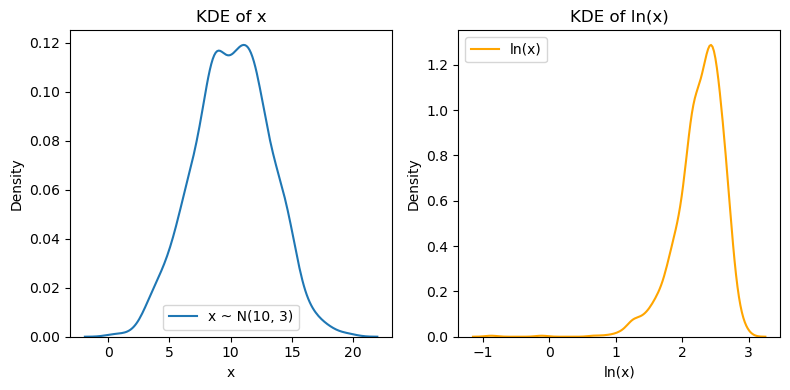

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 生成模拟数据
N = 1000
np.random.seed(142)  # For reproducibility
x = np.random.normal(loc=10, scale=3, size=N)
lnx = np.log(x)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(x, label='x ~ N(10, 3)')
plt.title('KDE of x')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(lnx, label='ln(x)', color='orange')
plt.title('KDE of ln(x)')
plt.xlabel('ln(x)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

## 多变量核密度函数图

- 不同时期的收入分布 - 时序
- 不同种族的收入分布 - 截面
- 联合分布

In [23]:
import requests
import pyreadstat

# 设置 User-Agent 模拟浏览器访问
url = "https://www.stata-press.com/data/r17/nlsw88.dta"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# 下载文件并保存到本地
r = requests.get(url, headers=headers)
with open("data/nlsw88.dta", "wb") as f:
    f.write(r.content)

# 用 pyreadstat 读取本地文件
df, meta = pyreadstat.read_dta("data/nlsw88.dta")

# 显示前几行
print(df.head())

   idcode  age  race  married  never_married grade  collgrad  south  smsa  \
0       1   37     2        0              0    12         0      0     1   
1       2   37     2        0              0    12         0      0     1   
2       3   42     2        0              1    12         0      0     1   
3       4   43     1        1              0    17         1      0     1   
4       6   42     1        1              0    12         0      0     1   

   c_city industry occupation union       wage hours    ttl_exp     tenure  
0       0        5          6     1  11.739125    48  10.333334   5.333333  
1       1        4          5     1   6.400963    40  13.621795   5.250000  
2       1        4          3   NaN   5.016723    40  17.730770   1.250000  
3       0       11         13     1   9.033813    42  13.211537   1.750000  
4       0        4          6     0   8.083731    48  17.820513  17.750000  


::: {.callout-tip}
### 提示词

- 绘制 White (race==1) 和 Black (race==2) 的 wage 变量的核密度函数图
- 尺寸：5 x 3
- 布局：1 行 1 列，将两个核密度函数图叠加
- 颜色：White = blue, Black = red (lpattern: dash)
- 透明度：0.8
- 标题字号: 12, 图例字号: 10, 横轴和纵轴字号: 10
:::

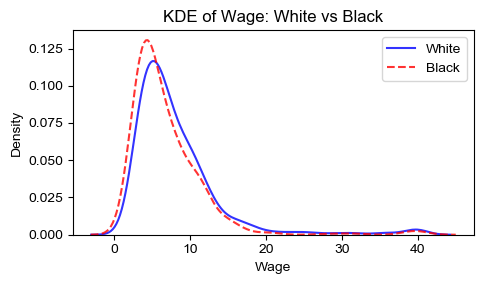

In [ ]:
plt.figure(figsize=(5, 3))
sns.kdeplot(df.loc[df['race'] == 1, 'wage'], 
            label='White', color='blue', alpha=0.8)
sns.kdeplot(df.loc[df['race'] == 2, 'wage'], 
            label='Black', color='red', alpha=0.8, linestyle='--')
plt.title('KDE of Wage: White vs Black', fontsize=12)
plt.xlabel('Wage', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**练习：** 绘制 White 和 Black 两个种族的妇女的 ln(wage) 的核密度函数图

### 多变量核密度函数图：山脊图

::: {.callout-tip}
### 提示词

- 目的：绘制多只股票 xxx 年日收益率的山脊图
- 数据来源：你选择合适的 package，适合中国大陆用户，自动在线下载
- 股票：中国移动，贵州茅台，万科A，比亚迪, 宁德时代, 南方航空, 格力电器
- 年份：2015 年 或 2024 年 或 2025 年 (可以指定一个 year 变量，我随后根据需要填写)
:::

<Figure size 800x600 with 0 Axes>

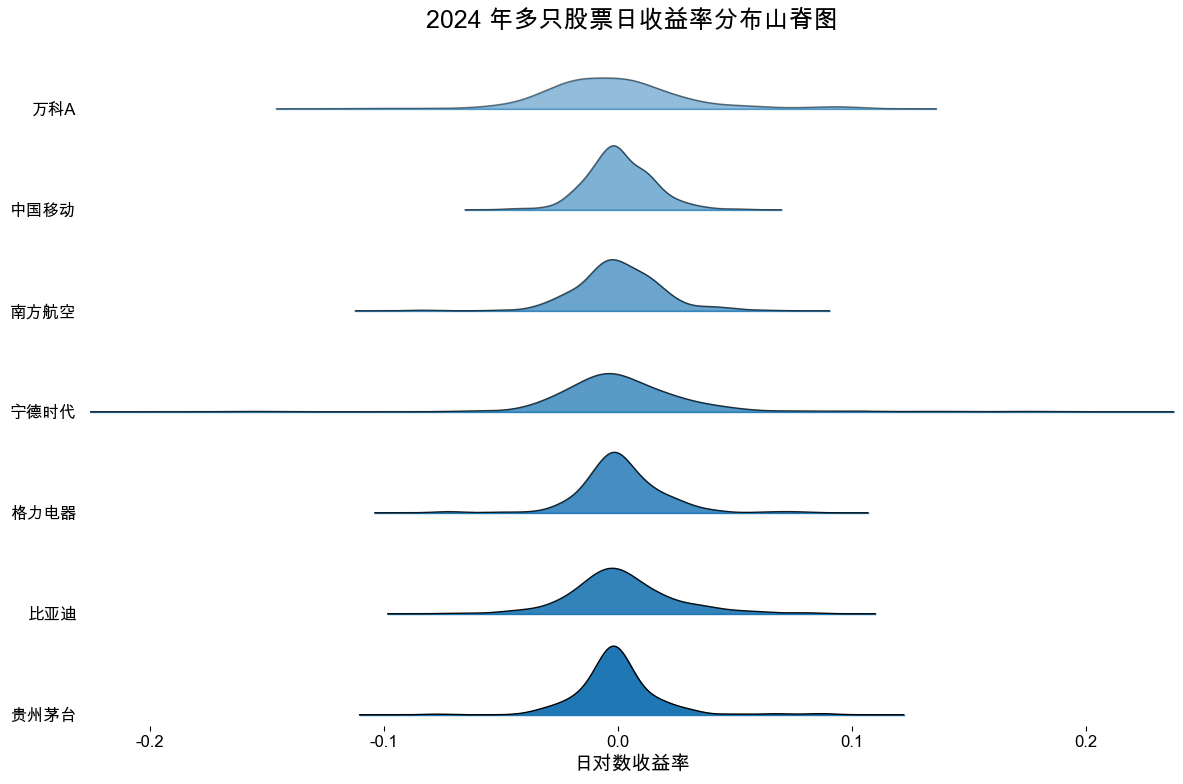

In [31]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joypy

# 设置 matplotlib 字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

# 股票代码字典
stock_dict = {
    '中国移动': 'sh600941',
    '贵州茅台': 'sh600519',
    '万科A': 'sz000002',
    '比亚迪': 'sz002594',
    '宁德时代': 'sz300750',
    '南方航空': 'sh600029',
    '格力电器': 'sz000651'
}

year = 2024  # 指定年份
start_date = f'{year}0101'
end_date = f'{year}1231'

returns_list = []

for name, code in stock_dict.items():
    try:
        df = ak.stock_zh_a_daily(symbol=code, start_date=start_date, end_date=end_date)
        if df.empty:
            print(f"{name}（{code}）在 {year} 年无数据，跳过。")
            continue
        df = df[['date', 'close']]
        df['date'] = pd.to_datetime(df['date'])
        df.sort_values('date', inplace=True)
        df['close'] = df['close'].astype(float)
        # 计算对数收益率
        df['log_ret'] = np.log(df['close']).diff()
        df['stock'] = name
        returns_list.append(df[['date', 'log_ret', 'stock']])
    except Exception as e:
        print(f"下载 {name}（{code}）时出错：{e}")

if len(returns_list) > 0:
    returns_df = pd.concat(returns_list, axis=0)
    returns_df = returns_df.dropna(subset=['log_ret'])
    data_long = returns_df[['stock', 'log_ret']]
    plt.figure(figsize=(8, 6))
    joypy.joyplot(data_long, by="stock", column="log_ret", 
                  figsize=(12, 8), 
                  bins=50,
                  range_style='own',
                  legend=False,
                  overlap=1, 
                  linewidth=1,
                  fade=True)
    plt.title(f"{year} 年多只股票日收益率分布山脊图", fontsize=18)
    plt.xlabel("日对数收益率", fontsize=14)
    plt.ylabel("股票名称", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("未能获得任何股票数据，无法绘图。")


## 进阶用法

### 散点图 + 核密度函数图

**penguins** 数据集是一个经典的数据集，包含了三种企鹅物种（Adelie、Chinstrap 和 Gentoo）的生物测量数据。该数据集常用于统计分析和机器学习建模的教学和研究。本例中，我们抽取了三个变量：

- `species`：企鹅的物种（Adelie、Chinstrap 或 Gentoo）。
- `flipper_length_mm`：鳍的长度（单位：毫米）。
- `bill_length_mm`：喙的长度（单位：毫米）。
- `body_mass_g`：体重（单位：克）。

下图中，我们使用 **seaborn** 中的 `jionplot` 函数绘制了散点图和核密度函数图。散点图展示了每个物种的鳍长和喙长的分布情况，而核密度函数图则呈现了横轴变量 (`flipper_length_mm`) 和纵轴变量 (`bill_length_mm`) 的分布情况。

散点图反映了企鹅的喙长 ($y$) 与鳍长 ($x$) 之间的关系。可以看出，虽然三种企鹅的 $y \sim x$ 之间都是正相关的，但 Chinstrap 类和 Gentoo 类企鹅的喙长和鳍长之间的正相关关系更强一些，而 Adelie 类企鹅的喙长和鳍长之间的正相关关系相对较弱。

密度函数图则揭示了单变量的分布特征。可以看出，平均而言，Adelie 类企鹅的喙长和鳍长都较小，而 Gentoo 类企鹅的喙长和鳍长都较大。Chinstrap 类企鹅的喙长 ($y$) 与 Gentoo 类企鹅的长度范围差不多，但平均而言，前者的喙更长一些；有趣的是，Chinstrap 类企鹅的鳍长 ($x$) 与 Adelie 类企鹅的长度范围差不多，但平均而言，前者的鳍更长一些。

虽然尚未看到三种企鹅的真实照片，但我们已经能够大致判断它们的体型特征了。

- Adelie：体型较小，喙长和鳍长都较小。
- Chinstrap：体型中等，喙长与 Gentoo 差不多；而鳍长则与 Adelie 相近。
- Gentoo：体型较大，喙长和鳍长都较大。

简言之，Adelie 是「短嘴短翅」，Chinstrap 是「长嘴短翅」，Gentoo 是「长嘴长翅」。若进一步结合散点图来看，则可以推断出：Gentoo 类企鹅群体身材较为均匀，而 Adelie 类企鹅个体之间的身材差异较大。

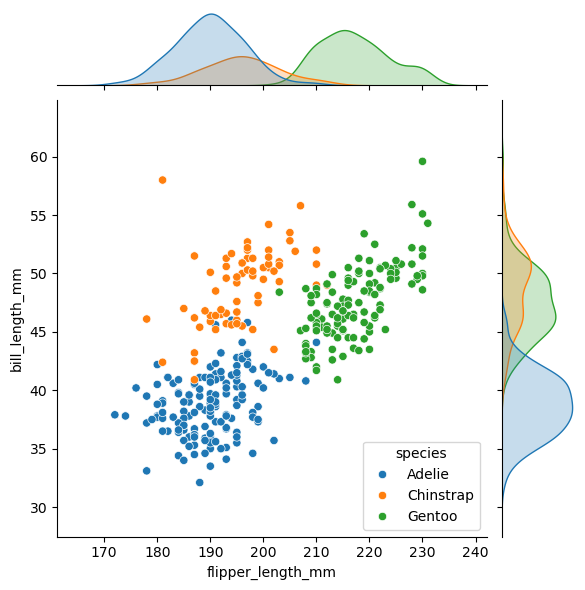

In [ ]:
# Source: https://seaborn.pydata.org/tutorial/introduction.html
import seaborn as sns
sns.jointplot(data=penguins, 
              x="flipper_length_mm", 
              y="bill_length_mm", 
              hue="species", 
              height=6)

> 它们到底长啥样？  

你可以在 [这里](https://www.animalspot.net/penguin) 找到它们的详细介绍。有位热心的[网友](https://www.deviantart.com/bluegio/art/Adelie-Chinstrap-and-Gentoo-867439280)特意绘制了它们的合影 (从左到右依次为 Adelie、Chinstrap 和 Gentoo)，如下图所示：

<img src="figs/graph-Adelie-Chinstrap-and-Gentoo-867439280.jpg" width="500pt">



### 多个变量的情形：pairplot

在上面的例子中，我们只考虑了两个变量之间的关系。实际上，数据集中可能有多个变量，此时可以使用 **seaborn** 中的 `pairplot` 函数来绘制多个变量之间的关系图。

下面的例子中，我们同时呈现了三个变量 (`flipper_length_mm`、`bill_length_mm` 和 `body_mass_g`) 之间的两两配对散点图，以及单个变量的核密度函数图。与此同时，我们还使用了不同的颜色来区分不同的物种。

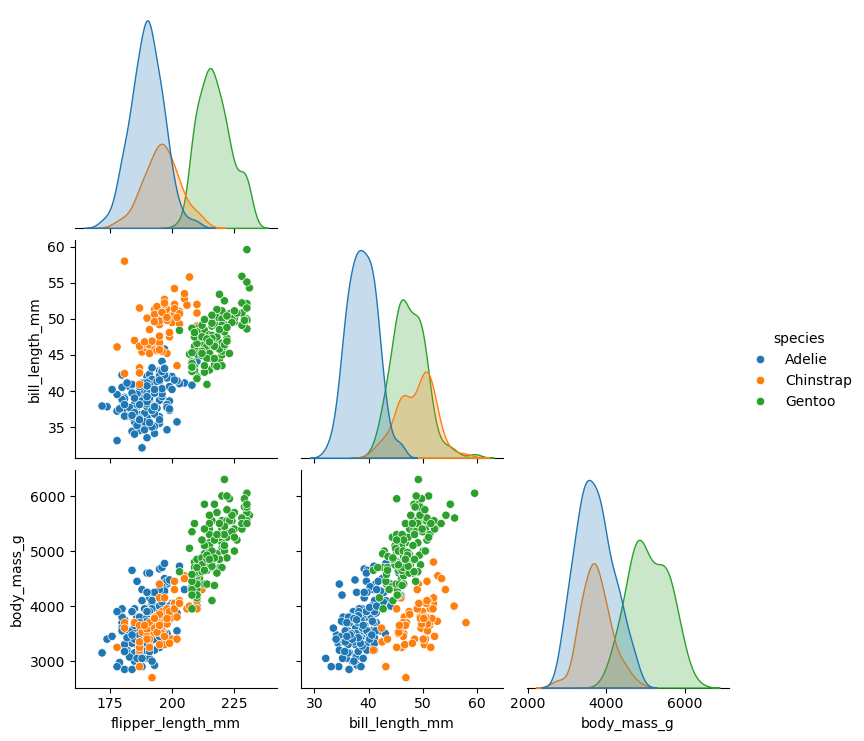

In [ ]:
# Source：https://seaborn.pydata.org/tutorial/introduction.html
vlist = ["flipper_length_mm", "bill_length_mm", "body_mass_g"]
sns.pairplot(data=penguins, vars=vlist, 
             hue="species", 
             corner=True)




### 联合分布图

https://seaborn.pydata.org/generated/seaborn.kdeplot.html


### 3D 核密度函数图


![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250511164056.png)

> Source: [matplotlib - Fill under 3D line graphs](https://matplotlib.org/stable/gallery/mplot3d/fillunder3d.html#sphx-glr-gallery-mplot3d-fillunder3d-py)

### 密度函数图+条形码

[seaborn.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html)

<Axes: xlabel='total_bill', ylabel='Density'>

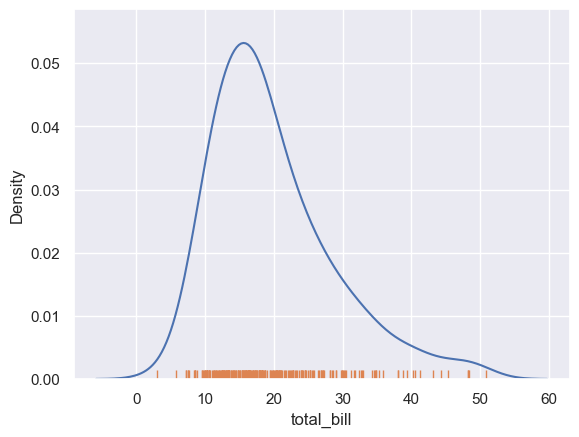

In [1]:
import seaborn as sns; sns.set_theme()
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")